In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
sns.set()
plt.style.use('seaborn-whitegrid')

data = pd.read_csv("/content/INRX.csv")
print(data.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2022-03-25  76.323502  76.606499  76.117996  76.323502  76.323502       0
1  2022-03-28  76.278503  76.626503  76.043701  76.278503  76.278503       0
2  2022-03-29  76.034103  76.299500  75.564697  76.034103  76.034103       0
3  2022-03-30  75.666702  75.972000  75.561501  75.666702  75.666702       0
4  2022-03-31  75.827797  76.058296  75.639503  75.827797  75.827797       0


<ipython-input-31-98914bd2a7e5>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


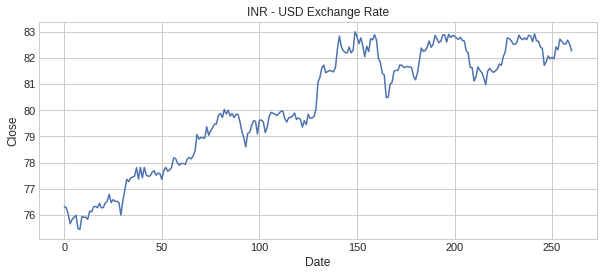

In [32]:
plt.figure(figsize=(10, 4))
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.997047  0.997199  1.000000   1.000000     NaN
High       0.997047  1.000000  0.995866  0.997047   0.997047     NaN
Low        0.997199  0.995866  1.000000  0.997199   0.997199     NaN
Close      1.000000  0.997047  0.997199  1.000000   1.000000     NaN
Adj Close  1.000000  0.997047  0.997199  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


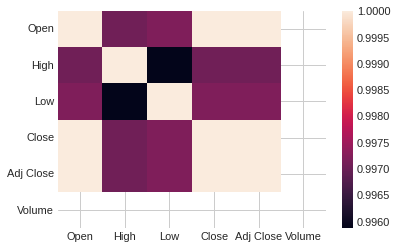

In [33]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [34]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [35]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [36]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data.head())

   Predicted Rate
0       76.527802
1       82.265297
2       81.519897
3       79.355301
4       82.878601
